# Proyek Analisis Data: **Air Quality Dataset**
- **Nama:** Josephine Dermawan
- **Email:** jojo.josephined@gmail.com
- **ID Dicoding:** axiomjo

## Menentukan Pertanyaan Bisnis

- Seperti apa tren komposisi-polutan-dara di masing-masing stasiun dari 2013-2017?
- Adakah momen-momen ketika polutan melonjak naik?
- Area mana yang sebaiknya diberi warning berdasarkan prediksi tren komposisi polutan udaranya?

S: ttg polusi udara (particulate matter, exhaust kendaraan SO2	NO2	CO	O3	)
M: koposisinya yg diukur
A: warn yg polusinya parah
R: kita gmw metong krn polusi udara
T: buat skrg

pola, prediksi

## Import Semua Packages/Library yang Digunakan

In [1]:

'''
\(* u*) this part just renames the library so they'll be eaasier to call later wkwkwkwk

pandas = database(?)

numpy = arrays(?), math operations
scipy = moar math ops

matplotlib = dataviz
seaborn = dataviz
(yk, i don't really know the difference between these two)

sqlalchemy = database, tapi online
'''
import pandas as pd

import numpy as np
import scipy as sp

import matplotlib.pyplot as mpl
import seaborn as sb

import sqlalchemy as sq


## Data Wrangling

### Gathering Data

In [2]:
'''
tabelnya sama semua, cuma beda kota. :o

not using sql yet, kyk yg di "akses data dari sql database"

so for now manggil file csv yg udh ku-reupload ke githubku aja.
ambil link dari tombol "Raw"
'''

area1_Ao = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

area2_Ch = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Changping_20130301-20170228.csv")

area3_Di = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Dingling_20130301-20170228.csv")

area4_Do = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Dongsi_20130301-20170228.csv")

area5_Ga = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Guanyuan_20130301-20170228.csv")

area6_Gc = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Gucheng_20130301-20170228.csv")

area7_Hu = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Huairou_20130301-20170228.csv")

area8_No = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

area9_Sh = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Shunyi_20130301-20170228.csv")

area10_Ti = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Tiantan_20130301-20170228.csv")

area11_Wl = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Wanliu_20130301-20170228.csv")

area12_Ws = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv")



In [3]:
""" 
supaya gampang, jadiin satu n tampilin
"""
data_semua_area = pd.concat([area1_Ao,area2_Ch,area3_Di,area4_Do,area5_Ga,area6_Gc,area7_Hu,area8_No,area9_Sh,area10_Ti,area11_Wl,area12_Ws]) 
data_semua_area

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [4]:
data_semua_area.station.value_counts()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64

**Insight:**
- datanya time value. periodenya sama semua.
- ada segitu banyak stasiun berbeda.

### Assessing Data

In [5]:
#minta ingfo ttg jumlah per kolom masse (*-*)/
data_semua_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [6]:
"""
(;0;) cek yg bermasalah:
- missing value
- invalid 
- duplicate
- inaccurate (...eh.. engga, aku pasrah)
- inconsistent (...engga juga, no way to find out yet)
- outlier
"""
data_semua_area.isnull().sum() #missing value 
# bisa pake data_semua_area.isna().sum() juga.


No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
data_semua_area.duplicated().sum() #duplicate

0

In [8]:
data_semua_area.describe(include="all") #outlier, pake interquartile range


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

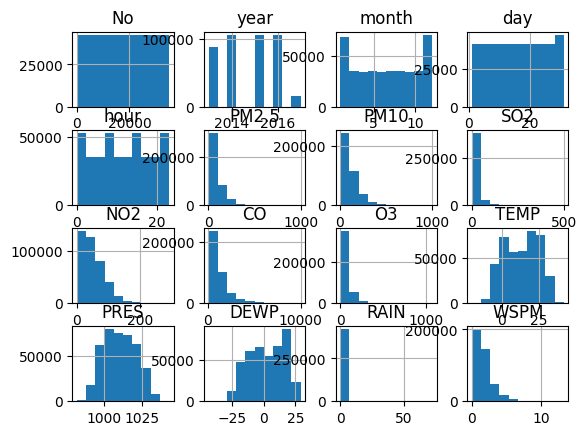

In [9]:
data_semua_area.hist()

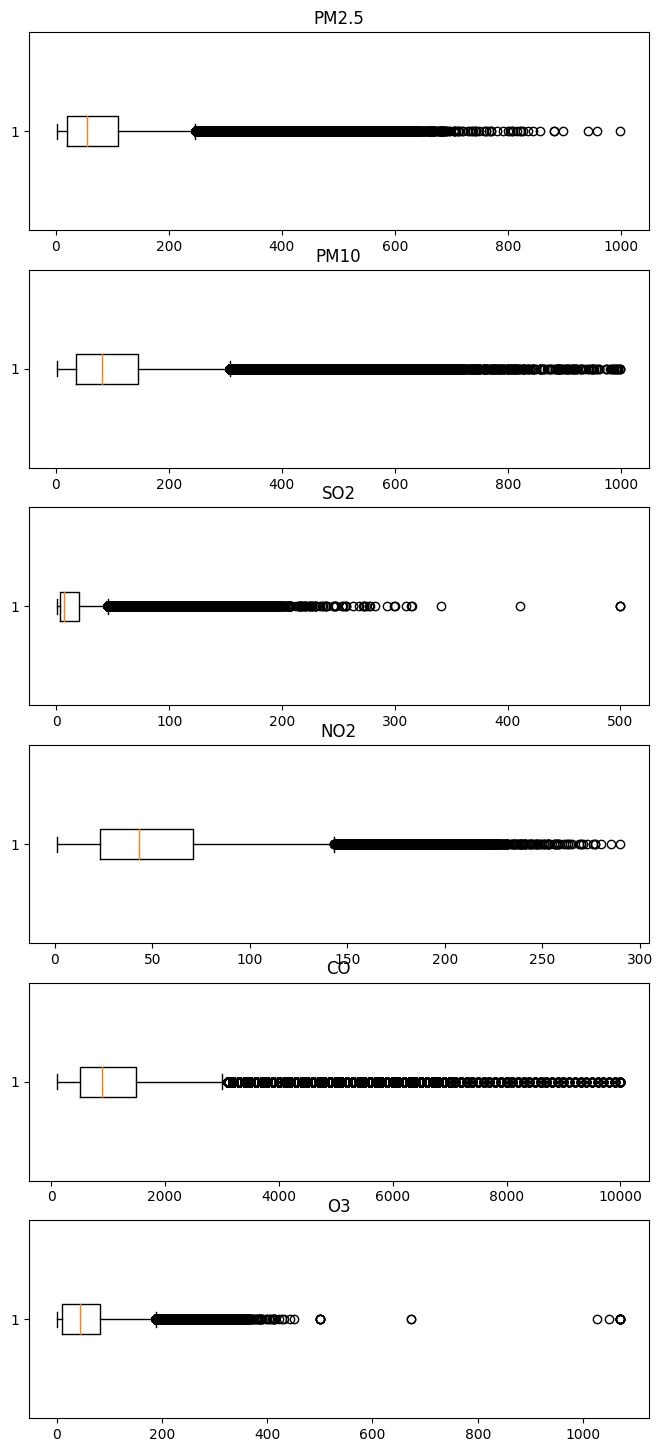

In [10]:
"""

:O
supaya gampang, liat IQR pake boxplot
tapi buat beberapa kolom aja.

pake looping,
dataframe pandasnya convert ke numpy dulu (tapi sekalian di-drop yg null supaya g error)
trus simpen di dictionary krn indeksnya string

trus bikin subplot buat matplotlib.pyplot supaya enak diliat

trus pake looping lagi buat nggambar(nge plot) boxplotnya 


"""

header_tabel_data = ["PM2.5","PM10","SO2","NO2","CO","O3"]
masing_masing_data_per_header = {}
for tiap_header_data in header_tabel_data:
    masing_masing_data_per_header[tiap_header_data] = pd.to_numeric(data_semua_area[tiap_header_data], errors='coerce'  ).dropna().to_numpy()

#krn males ngitung..., jadi auto resize sesuai banyak header
banyak_header = len(masing_masing_data_per_header)  
fig, axes = mpl.subplots(banyak_header, 1, figsize=(8, banyak_header * 3))

for idx, (header, data) in enumerate(masing_masing_data_per_header.items()):
    axes[idx].boxplot(data, vert=False)  
    axes[idx].set_title(header)

**Insight:**


(;0;) hasil cek yg bermasalah:
- missing value
   buanyak. tiap header ada huhuhuhuhu

PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277

- invalid
    gaada yey :>
  
- duplicate
    gaada yey :>

- outlier
   somehow, banyak bgt outliernya (apa karena kugabung semua wilayah?) yea... aku perlu nganalisis per header per wilayah....



### Cleaning Data

In [11]:
"""
problem #1 MISSING VALUE (T-T)
karena dataku time series... keknya jgn di-drop, 
karena dataku ga kategoris... keknya jgn di-imputate,
so.. interpolation it is.

oh, trus kupindah ke dataframe baru.
"""

cleaned_data_semua_area = data_semua_area.interpolate(method='linear')
cleaned_data_semua_area

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [12]:
cleaned_data_semua_area.isna().sum() #missing value 

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [13]:
cleaned_data_semua_area.drop(['TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM'], axis=1, inplace=True)
cleaned_data_semua_area

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong


Station: Aotizhongxin, Pollutant: PM2.5, Data Count: 35064, Outliers: 1653
Station: Aotizhongxin, Pollutant: PM10, Data Count: 35064, Outliers: 1130
Station: Aotizhongxin, Pollutant: SO2, Data Count: 35064, Outliers: 2864
Station: Aotizhongxin, Pollutant: NO2, Data Count: 35064, Outliers: 560
Station: Aotizhongxin, Pollutant: CO, Data Count: 35064, Outliers: 2695
Station: Aotizhongxin, Pollutant: O3, Data Count: 35064, Outliers: 1399
Station: Changping, Pollutant: PM2.5, Data Count: 35064, Outliers: 1711
Station: Changping, Pollutant: PM10, Data Count: 35064, Outliers: 1350
Station: Changping, Pollutant: SO2, Data Count: 35064, Outliers: 3188
Station: Changping, Pollutant: NO2, Data Count: 35064, Outliers: 813
Station: Changping, Pollutant: CO, Data Count: 35064, Outliers: 2693
Station: Changping, Pollutant: O3, Data Count: 35064, Outliers: 1639
Station: Dingling, Pollutant: PM2.5, Data Count: 35064, Outliers: 1842
Station: Dingling, Pollutant: PM10, Data Count: 35064, Outliers: 1407
S

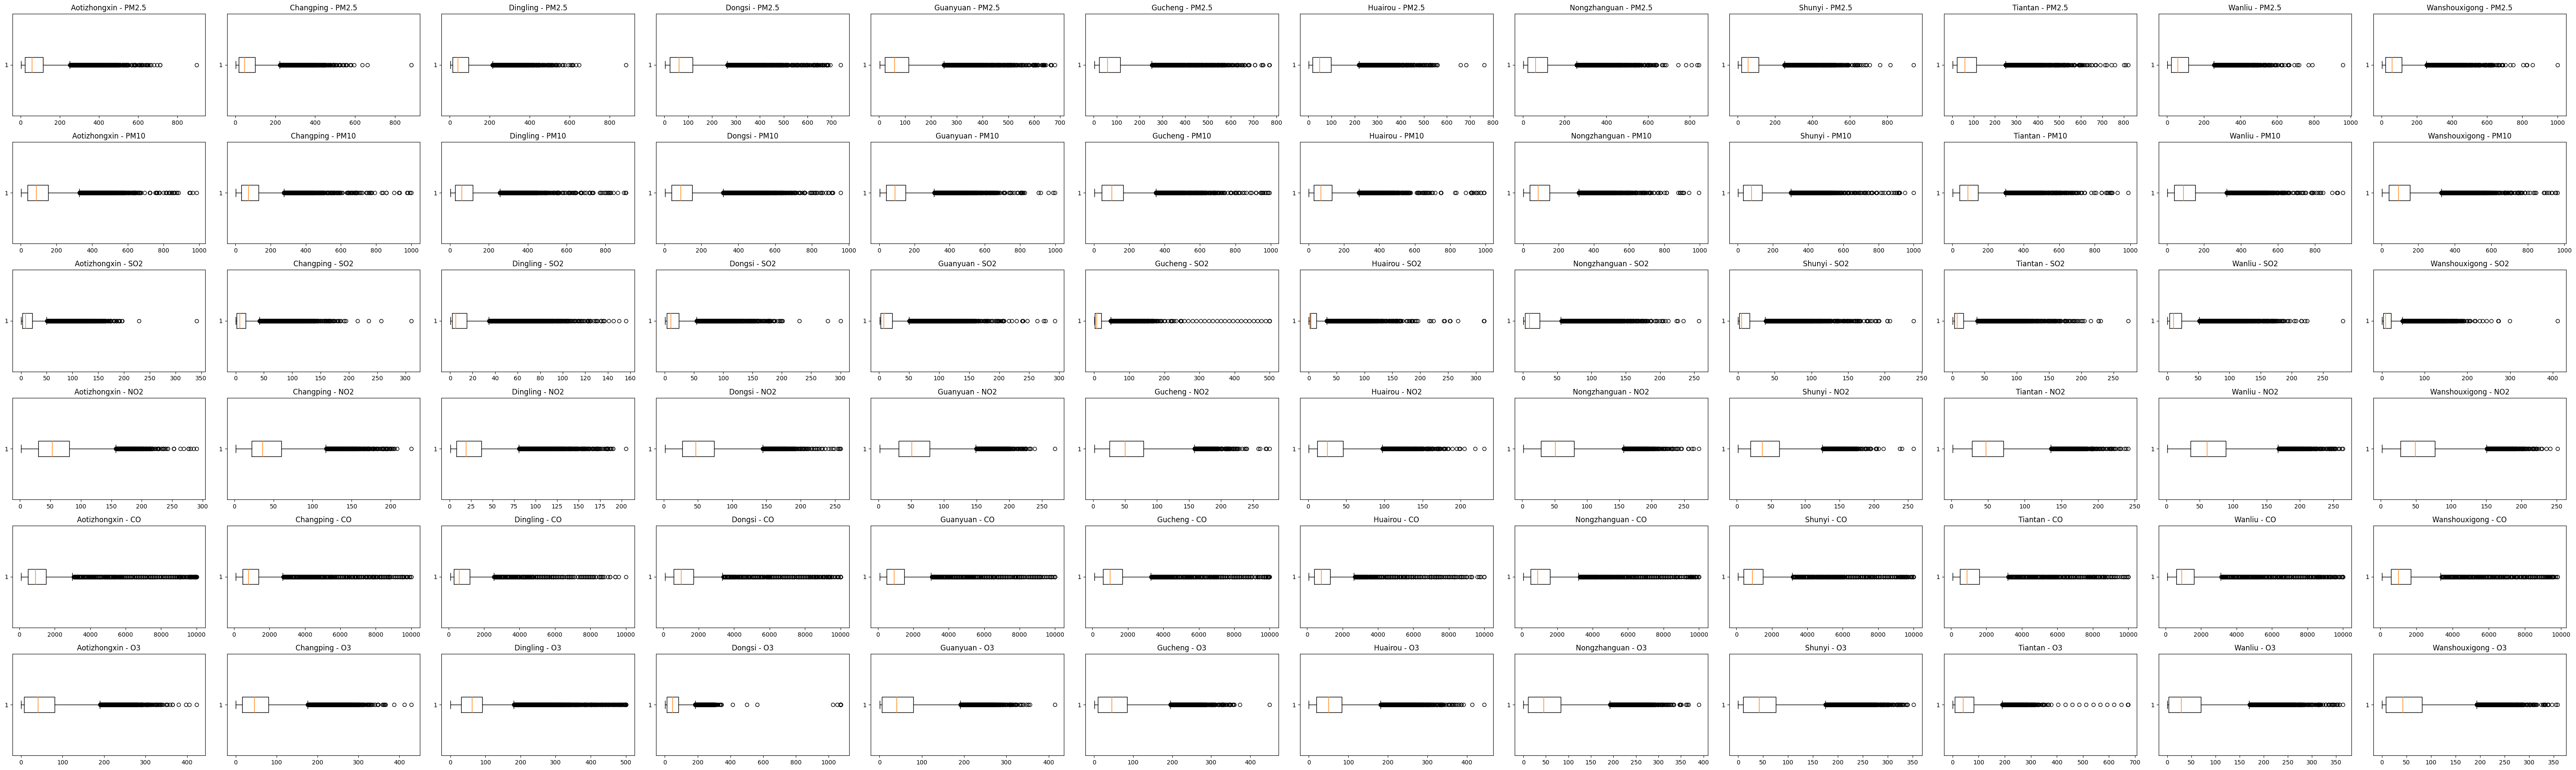

In [40]:
"""
problem #2 OUTLIER (T-T)
karena outlier lebih jelas klo konteksnya per kota...
i need to beresin per kota... 
"""

key_stasiun_data = cleaned_data_semua_area["station"].unique()
header_tabel_data = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

fig, axes = mpl.subplots(len(header_tabel_data), len(key_stasiun_data), figsize=(len(key_stasiun_data) * 5, len(header_tabel_data) * 3))

outlier_data_semua_area = {}

for i, tiap_key in enumerate(key_stasiun_data):
    stasiun_data = cleaned_data_semua_area[cleaned_data_semua_area["station"] == tiap_key]

    for j, tiap_header_data in enumerate(header_tabel_data):
        # Convert to numeric and remove NaN
        data_per_header = pd.to_numeric(stasiun_data[tiap_header_data], errors='coerce').dropna().to_numpy()

        Q1 = np.percentile(data_per_header, 25)
        Q3 = np.percentile(data_per_header, 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_data_semua_area = data_per_header[(data_per_header < lower_bound) | (data_per_header > upper_bound)]


        # Debugging output
        print(f"Station: {tiap_key}, Pollutant: {tiap_header_data}, Data Count: {len(data_per_header)}, Outliers: {len(outlier_data_semua_area)}")

        axes[j, i].boxplot(data_per_header, vert=False)
        axes[j, i].set_title(f"{tiap_key} - {tiap_header_data}")

mpl.tight_layout()
mpl.show()


**Insight:**
- OUTLIERNYA GAK KAYAK OUTLIER GASIII? terlalu banyak klo diilangin.
- udah diambil yg perlu aja

## Exploratory Data Analysis (EDA)

### Explore 
- Seperti apa tren komposisi-polutan-dara di masing-masing stasiun dari 2013-2017?
- Adakah momen-momen ketika polutan melonjak naik?
- Area mana yang sebaiknya diberi warning berdasarkan prediksi tren komposisi polutan udaranya?


In [44]:
cleaned_data_semua_area.groupby(by='station').agg({
    'PM2.5': ['mean','max', 'min'],
    'PM10': ['mean','max', 'min'],
    'SO2': ['mean','max', 'min'],
    'NO2': ['mean','max', 'min'],
    'CO': ['mean','max', 'min'],
    'O3': ['mean','max', 'min'],
              
})




PM2.5                    PM10                    SO2  \
                    mean    max  min        mean    max  min       mean   
station                                                                   
Aotizhongxin   82.540623  898.0  3.0  110.210033  984.0  2.0  17.459251   
Changping      70.986438  882.0  2.0   94.788575  999.0  2.0  14.943066   
Dingling       66.845557  881.0  3.0   84.113713  905.0  2.0  11.797849   
Dongsi         86.144243  737.0  3.0  110.347617  955.0  2.0  18.506142   
Guanyuan       82.897522  680.0  2.0  109.372349  999.0  2.0  17.609312   
Gucheng        84.074802  770.0  2.0  119.261567  994.0  2.0  15.705821   
Huairou        69.501747  762.0  2.0   92.422670  993.0  2.0  12.446681   
Nongzhanguan   85.079472  844.0  2.0  109.384022  995.0  2.0  18.760102   
Shunyi         79.437962  941.0  2.0   99.271936  999.0  2.0  13.445971   
Tiantan        82.033097  821.0  3.0  106.537076  988.0  2.0  14.510018   
Wanliu         83.467612  957.0  2.0  110.707858  951.0  2.0  18.409514   
Wanshouxigong  85.067548  999.0  3.0  112.505795  961.0  2.0  17.363354   

                                    NO2                          CO           \
                 max     min       mean    max     min         mean      max   
station                                                                        
Aotizhongxin   341.0  0.2856  59.074106  290.0  2.0000  1264.692405  10000.0   
Changping      310.0  0.2856  44.206153  226.0  1.8477  1156.990246  10000.0   
Dingling       156.0  0.2856  27.304331  205.0  1.0265   925.111838  10000.0   
Dongsi         300.0  0.2856  53.953078  258.0  2.0000  1331.913045  10000.0   
Guanyuan       293.0  1.0000  58.139298  270.0  2.0000  1258.327045  10000.0   
Gucheng        500.0  0.2856  55.836004  276.0  2.0000  1338.100060  10000.0   
Huairou        315.0  0.2856  32.077275  231.0  1.0265  1019.671871  10000.0   
Nongzhanguan   257.0  0.5712  58.095053  273.0  2.0000  1327.767611  10000.0   
Shunyi         239.0  0.2856  44.094695  258.0  2.0000  1197.904660  10000.0   
Tiantan        273.0  0.5712  53.258828  241.0  2.0000  1305.333262  10000.0   
Wanliu         282.0  0.2856  65.668418  264.0  1.6424  1328.761180  10000.0   
Wanshouxigong  411.0  0.2856  55.495402  251.0  2.0000  1373.618569   9800.0   

                             O3                     
                 min       mean        max     min  
station                                             
Aotizhongxin   100.0  55.328626   423.0000  0.2142  
Changping      100.0  57.976253   429.0000  0.2142  
Dingling       100.0  70.530792   500.0000  0.2142  
Dongsi         100.0  57.700357  1071.0000  0.6426  
Guanyuan       100.0  54.817142   415.0000  0.2142  
Gucheng        100.0  58.000001   450.0000  0.2142  
Huairou        100.0  60.872173   444.0000  0.2142  
Nongzhanguan   100.0  58.432876   390.0000  0.2142  
Shunyi         100.0  54.218810   351.7164  0.2142  
Tiantan        100.0  56.148077   674.0000  0.4284  
Wanliu         100.0  46.909375   364.0000  0.2142  
Wanshouxigong  100.0  55.919979   358.0000  0.2142

In [ ]:
"""
(T-T) gakuat liat angkaaaaa, butuh datavizzzzzz
"""

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2